In [127]:
import pandas as pd
import sys
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.insert(0, '../../')

# read in data

In [128]:
original_df = pd.read_csv('../../data/imbalance_data/cleaned_08-01-2020_22_15_47 - 08-01-2020_22_15_47_355pm_data.csv')

In [129]:
original_df

,symbol,currentvolume,lastprice,nbb,nbo,imbside,imbalancesize,notional_imbalance,imbalancetype,matchedsize,...,matched_to_unmatched,close,pct_move_snapshot_to_close,minute,day,quarter,year,week,month,lastprice_unnormalized
0,-1.718688,-0.054305,1.392242,1.394237,1.392162,1.013307,-0.210636,0.039087,NaN,-0.277435,...,-0.082308,198.35,0.02,0.515135,0.834293,0.183254,-0.881734,0.011458,-0.046315,198.310
1,-1.704721,0.279750,0.425568,0.426335,0.425290,-0.986868,-0.270171,-0.295291,NaN,-0.075516,...,-0.303629,112.42,-0.11,0.515135,0.834293,0.183254,-0.881734,0.011458,-0.046315,112.540
2,-1.687263,-0.094248,1.617427,1.618649,1.616335,-0.986868,-0.030292,1.056371,NaN,0.012160,...,-0.106736,218.21,-0.04,0.515135,0.834293,0.183254,-0.881734,0.011458,-0.046315,218.290
3,-1.669805,0.320424,0.670251,0.671271,0.670190,1.013307,-0.097492,0.291106,NaN,-0.195496,...,0.012179,134.49,0.18,0.515135,0.834293,0.183254,-0.881734,0.011458,-0.046315,134.250
4,-1.655838,-0.260154,0.164599,0.164709,0.164281,1.013307,-0.284969,-0.339231,NaN,-0.381435,...,-0.022815,89.37,-0.02,0.515135,0.834293,0.183254,-0.881734,0.011458,-0.046315,89.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,1.738054,-0.247112,-0.674887,-0.674974,-0.674734,-0.986868,-0.114043,-0.284186,NaN,-0.072717,...,-0.137215,14.82,-0.54,0.515135,0.568738,-1.013496,1.134129,-0.836318,-0.852102,14.900
6729,1.741546,1.070155,-0.676972,-0.677117,-0.676874,-0.986868,-0.092098,-0.276968,NaN,0.119856,...,-0.193894,14.69,-0.17,0.515135,0.568738,-1.013496,1.134129,-0.836318,-0.852102,14.715
6730,-0.653732,-0.299779,0.244000,0.243761,0.244037,-0.986868,-0.277076,-0.319540,NaN,-0.115672,...,-0.309092,96.67,0.25,0.515135,0.568738,-1.013496,1.134129,-0.836318,-0.852102,96.430
6731,1.566963,-0.233144,-0.365849,-0.365760,-0.365848,1.013307,-0.278932,-0.338086,NaN,-0.271185,...,-0.293881,42.29,-0.07,0.515135,0.568738,-1.013496,1.134129,-0.836318,-0.852102,42.320


In [130]:
original_df.drop('imbalancetype', inplace=True, axis=1)

In [131]:
p_and_l_df = original_df[['close', 'lastprice_unnormalized']] # use this for p&l


In [132]:
imbal_train_df = original_df.loc[:, (original_df.columns!='close') &  (original_df.columns!='lastprice_unnormalized') ]

# take top cols
- need to run all cells first

In [133]:
cols_to_select = list(X_train.columns[np.array(lr.coef_ > .0005).ravel()])

In [134]:
cols_to_select.append('pct_move_snapshot_to_close')
smaller_imbal_train_df = imbal_train_df.loc[:,imbal_train_df.columns.isin(cols_to_select)]

# split into x and y

In [135]:

imbal_train_X = imbal_train_df.loc[:, imbal_train_df.columns != 'pct_move_snapshot_to_close']
imbal_train_y = imbal_train_df.loc[:, imbal_train_df.columns == 'pct_move_snapshot_to_close']

In [136]:
imbal_train_y

,pct_move_snapshot_to_close
0,0.02
1,-0.11
2,-0.04
3,0.18
4,-0.02
...,...
6728,-0.54
6729,-0.17
6730,0.25
6731,-0.07


In [137]:
# # small cols

# imbal_train_X = smaller_imbal_train_df.loc[:, smaller_imbal_train_df.columns != 'pct_move_snapshot_to_close']
# imbal_train_y = smaller_imbal_train_df.loc[:, smaller_imbal_train_df.columns == 'pct_move_snapshot_to_close']

# train a model

In [142]:
mae = []
mae_above_threshold = []
mae_positive_predictions = []
mae_negative_predictions= [] 
n_correct_signs=[]

n_correct_sign_and_more_extreme_predictions = []
n_correct_sign_and_threshold = []
total_delta_close_last = []
len_correct=[]
threshold = .10
cv = 120

position_size_in_dollars=100_000
cost_per_1k_shares_entry_and_exit=6
# How much does it cost per share?
# $6 per 1k shares on entry and exit

for i in range(cv):
    if i % 20 == 0:
        print(f"PCT finished = {i/cv:.2%}")
    lr =LinearRegression()
    X_train, X_test, y_train, y_test  = train_test_split(imbal_train_X, imbal_train_y, test_size=0.15) # RandomForestRegressor(n_jobs=-1) #ain, X_test, y_train, y_test  = train_test_split(imbal_train_X, imbal_train_y, test_size=0.10)
    p_and_l_test_df = X_test.join(p_and_l_df)
    
    
    lr.fit(X_train, y_train )

    test_predictions = lr.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions) )

    # what about more extreme predicitons, above threshold
    threshold_mask = np.abs(test_predictions) > threshold
    threshold_test_predictions = test_predictions[threshold_mask]
    threshold_y_test = y_test[threshold_mask]
    mae_above_threshold.append(mean_absolute_error(threshold_y_test, threshold_test_predictions))

    # are we better at positive or negative predictions?
    positive_mask = np.sign(test_predictions) == 1
    positive_predictions = test_predictions[positive_mask]
    positive_y_test = y_test[positive_mask]
    mae_positive_predictions.append(mean_absolute_error(positive_y_test, positive_predictions))

    negative_predictions = test_predictions[np.sign(test_predictions) == -1]
    negative_y_test = y_test[np.sign(test_predictions) == -1]
    mae_negative_predictions.append(mean_absolute_error(negative_y_test, negative_predictions))

    # sign of prediction and more extreme signs
    len_correct.append(len(y_test))
    n_sign_and_extreme = []
    n_sign = []
    n_sign_and_threshold = []
    delta_close_last_array = []
    
    start_prices_running_sum = 0
    end_prices_running_sum = 0 # this should be higher
    
    prediction_index = 0
    for pred_, true_ in zip(test_predictions, np.array(y_test).ravel()):

        if (np.sign(pred_) == np.sign(true_) ) and (np.abs(true_) > np.abs(pred_)):
            n_sign_and_extreme.append(1)
        if (np.sign(pred_) == np.sign(true_) ) :
            n_sign.append(1)
        if (np.abs(pred_) > threshold) and (np.sign(pred_) == np.sign(true_) ) : 
            n_sign_and_threshold.append(1)
            
        if (np.abs(pred_) > threshold): ## get into a position here
            stock_direction_pred = np.sign(pred_) # direction stock is going to move
            
            # calculate P & l
            last_price =  p_and_l_test_df.iloc[prediction_index, :]['lastprice_unnormalized']
            
            close_price = p_and_l_test_df.iloc[prediction_index, :]['close']
            
            if stock_direction_pred > 0: # going up
                delta_close_last_pct = (close_price - last_price) / close_price
                start_prices_running_sum += last_price 
                end_prices_running_sum += close_price
                
                if (prediction_index % 400 == 0) and (i % 20 == 0):
                    print('Stock prediction direction = going up')
                    print('prediction pct_move_to_close = ', pred_)
                    print('actual pct_move_to_close=',delta_close_last_pct)
                    print('last_price at 3:50pm=',last_price)
                    print('close_price=', close_price)
                    print('prediction_index=',prediction_index)
                    print(' ')

            
            else: # going down
                delta_close_last_pct = (close_price - last_price ) / last_price
                start_prices_running_sum += close_price 
                end_prices_running_sum += last_price
                
                if (prediction_index % 400 == 0) and (i % 20 == 0):
                    print('Stock prediction direction = going down')
                    print('prediction pct_move_to_close = ', pred_)

                    print('actual pct_move_to_close=',delta_close_last_pct)
                    print('last_price at 3:50pm=',last_price)
                    print('close_price=', close_price)
                    print('prediction_index=',prediction_index)
                    print(' ')

            delta_close_last_array.append(delta_close_last_pct)
                
            
        prediction_index += 1
            
            
            
                
    n_correct_sign_and_more_extreme_predictions.append(np.sum(n_sign_and_extreme))
    n_correct_signs.append(np.sum(n_sign))
    n_correct_sign_and_threshold.append(np.sum(n_sign_and_threshold))
    total_delta_close_last.append(np.median(delta_close_last_array))



PCT finished = 0.00%
Stock prediction direction = going down
prediction pct_move_to_close =  [-0.19937088]
actual pct_move_to_close= -0.003243243243243174
last_price at 3:50pm= 4.625
close_price= 4.61
prediction_index= 400
 
PCT finished = 16.67%
Stock prediction direction = going down
prediction pct_move_to_close =  [-0.25757188]
actual pct_move_to_close= -0.0021180457497881953
last_price at 3:50pm= 354.1
close_price= 353.35
prediction_index= 800
 
PCT finished = 33.33%
Stock prediction direction = going down
prediction pct_move_to_close =  [-0.14499651]
actual pct_move_to_close= 0.00279698137104861
last_price at 3:50pm= 189.49
close_price= 190.02
prediction_index= 0
 
Stock prediction direction = going down
prediction pct_move_to_close =  [-0.19495989]
actual pct_move_to_close= -0.0023239365464282507
last_price at 3:50pm= 49.485
close_price= 49.37
prediction_index= 400
 
Stock prediction direction = going down
prediction pct_move_to_close =  [-0.10428871]
actual pct_move_to_close= -0

In [143]:
end_prices_running_sum

44023.65719999998

In [144]:
start_prices_running_sum

43854.06410000001

In [145]:
print(f"median mae for negative predictions = {np.median(mae_negative_predictions):.2%}")
print(f"median mae for positive predictions = {np.median(mae_positive_predictions):.2%}") # slightly better as positive predictions
print(f"median MAE with threshold predictions = {np.median(mae_above_threshold):.2%}")
print(f"median MAE with all data is {np.median(mae):.2%}")
print(f"pct of the time we guess the corect sign (up or down) all data is {np.sum(n_correct_signs)/np.sum(len_correct):.2%}")
print(f"pct of the time we guess the corect sign (up or down) all data and the true data is more extreme {np.sum(n_correct_sign_and_more_extreme_predictions)/np.sum(len_correct):.2%}")
print(f"pct of the time we guess the corect sign (up or down) and the prediction is more extreme than our threshold \
    of {threshold} =  {np.sum(n_correct_sign_and_threshold)/np.sum(len_correct):.2%}")
print(f"The expected profit in pct per dollar  put in is {(end_prices_running_sum / start_prices_running_sum) - 1:.6%}")


median mae for negative predictions = 22.51%
median mae for positive predictions = 21.03%
median MAE with threshold predictions = 24.15%
median MAE with all data is 22.37%
pct of the time we guess the corect sign (up or down) all data is 60.97%
pct of the time we guess the corect sign (up or down) all data and the true data is more extreme 37.72%
pct of the time we guess the corect sign (up or down) and the prediction is more extreme than our threshold     of 0.1 =  39.30%
The expected profit in pct per dollar  put in is 0.386722%


# Coefficients

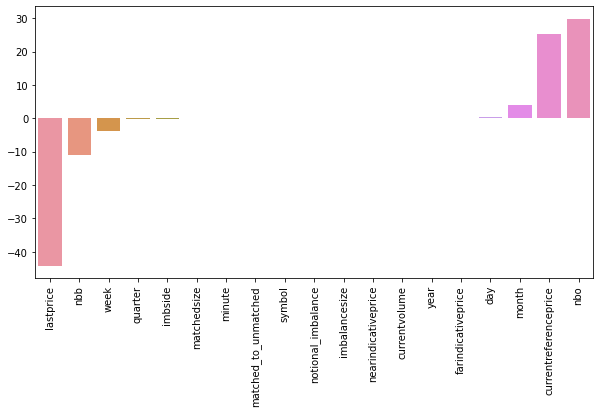

In [97]:
plt.figure(figsize=(10,5))
sns.barplot(x = X_train.columns[np.argsort(lr.coef_).ravel()], y = lr.coef_.ravel()[np.argsort(lr.coef_).ravel()])
plt.xticks(rotation=90) ;

In [98]:
X_train.columns[np.argsort(lr.coef_).ravel()]

Index(['lastprice', 'nbb', 'week', 'quarter', 'imbside', 'matchedsize',
       'minute', 'matched_to_unmatched', 'symbol', 'notional_imbalance',
       'imbalancesize', 'nearindicativeprice', 'currentvolume', 'year',
       'farindicativeprice', 'day', 'month', 'currentreferenceprice', 'nbo'],
      dtype='object')

In [106]:
pd.DataFrame(lr.coef_.ravel()[np.argsort(lr.coef_).ravel()], X_train.columns[np.argsort(lr.coef_).ravel()], 
             columns=['coefficient value'])

,coefficient value
lastprice,-44.205370
nbb,-10.878522
week,-3.748939
quarter,-0.150459
imbside,-0.061342
matchedsize,-0.015899
minute,-0.013836
matched_to_unmatched,-0.007467
symbol,-0.004635
notional_imbalance,-0.000268
